# Learning outcomes
1. Geometric transformation: rotation, translation, affine transformation and perspective transformation.
2. Drawing functions
    - line
    - circle
    - ellipse
    - rectangle
    - text
3. Bitwise operations
    - OR, AND, XOR, NOT
4. Convolution: Something and sharpening. THis operations are central to CNN

# Setup

In [1]:
import sys
assert sys.version_info >=(3, 7)

import numpy as mp
import cv2 as cv
from util_func import *

In [2]:
!pip install scipy


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Grometric transformation

In [3]:
# translation
img = cv.imread("images/lena.jfif")

h, w = img.shape[:2]
tx = 50
ty = 80
M = np.float32([[1, 0, tx], [0, 1, ty]])

dst = cv.warpAffine(img, M, (w+tx, h+ty))

show_img("translation", dst)

### Rotation

In [4]:
yc, xc = h//2, w//2
angle = 45

M = cv.getRotationMatrix2D((xc, yc), angle, 1)
dst = cv.warpAffine(img, M, (w, h))
show_img("rotation", dst)

## Affine transformation

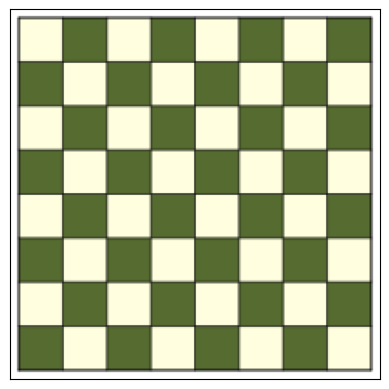

In [5]:
img = cv.imread("images/chessboard.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_copy = img.copy()

plt_img(img)

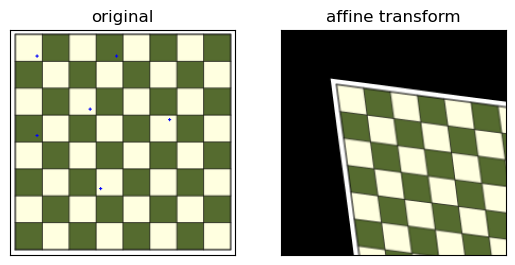

In [6]:
h, w = img.shape[:2]
# 3 pair of points
p0 = np.float32([[25, 25], [100, 25], [25, 100]])
p1 = np.float32([[75, 75], [150, 85], [85, 150]])

for pt in p0:
    cv.circle(img, (int(pt[0]), int(pt[1])), 1, (0, 0, 255), -1)

# get the M
M = cv.getAffineTransform(p0, p1)
dst = cv.warpAffine(img_copy, M, (w, h))
              
for pt in p1:
      cv.circle(img, (int(pt[0]), int(pt[1])), 1, (0, 0, 255), -1)
        
plt.subplot(121), plt_img(img, title="original")
plt.subplot(122), plt_img(dst, title="affine transform")
plt.show()

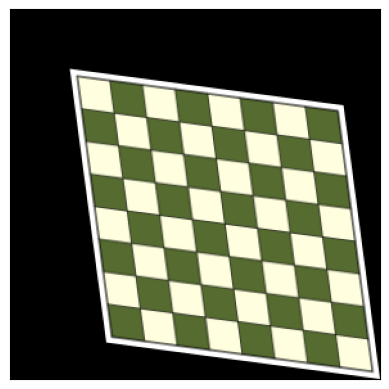

In [7]:
dst_new = cv.warpAffine(img_copy, M, (w+75, h+75))

plt_img(dst_new)

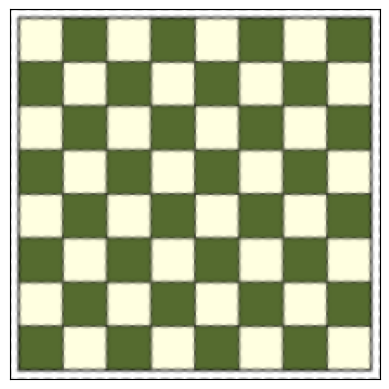

In [8]:
M_inv = cv.getAffineTransform(p1, p0)
ori_restore = cv.warpAffine(dst_new, M_inv, (w, h))

plt_img(ori_restore)

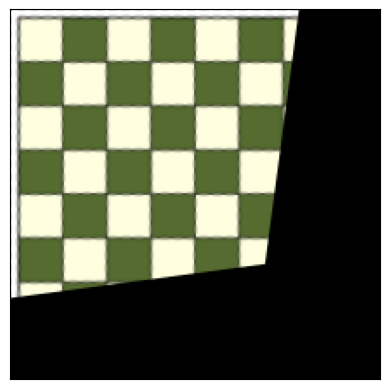

In [9]:
M_inv = cv.getAffineTransform(p1, p0)
ori_restore = cv.warpAffine(dst, M_inv, (w, h))

plt_img(ori_restore)

### Perspective transform

In [10]:
img = cv.imread("images/name_card_sample.jpeg")

show_img("name card", img, adjust=True)

In [11]:
# to get the corners, mouse callback function
p = []

def mouse(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print((x, y))
        p.append((x, y))
        cv.circle(img, (x, y), 2, (0, 0, 255), -1)
        cv.imshow("img", img)
        
cv.imshow("img", img)
cv.setMouseCallback("img", mouse)
cv.waitKey(0)
cv.destroyAllWindows()

(223, 198)
(1434, 86)
(1707, 502)
(130, 726)


In [12]:
from scipy.spatial.distance import euclidean

In [13]:
w1 = euclidean(p[0], p[1])
w2 = euclidean(p[2], p[3])

h1 = euclidean(p[0], p[3])
h2 = euclidean(p[1], p[2])

H = max(h1, h2)
W = max(w1, w2)

p_array = np.float32(p)
dst = np.float32([[0, 0], [W-1, 0], [W-1, H-1], [0, H-1]])

M = cv.getPerspectiveTransform(p_array, dst)
wrap = cv.warpPerspective(img, M, (int(W), int(H)))

cv.namedWindow("img", cv.WINDOW_NORMAL)
cv.imshow("img", img)
show_img("wrap", wrap)

### Exercise
Use the image "dice.jfif"
<img src="images/dice.jfif" alt="Alternative text" />

In [14]:
img = cv.imread("images/dice.jfif")

# to get the corners, mouse callback function
p = []

def mouse(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print((x, y))
        p.append((x, y))
        cv.circle(img, (x, y), 2, (0, 0, 255), -1)
        cv.imshow("img", img)
        
cv.imshow("img", img)
cv.setMouseCallback("img", mouse)
cv.waitKey(0)
cv.destroyAllWindows()

(9, 66)
(72, 71)
(82, 137)
(21, 137)


In [15]:
w1 = euclidean(p[0], p[1])
w2 = euclidean(p[2], p[3])

h1 = euclidean(p[0], p[3])
h2 = euclidean(p[1], p[2])

H = max(h1, h2)
W = max(w1, w2)

p_array = np.float32(p)
dst = np.float32([[0, 0], [W-1, 0], [W-1, H-1], [0, H-1]])

M = cv.getPerspectiveTransform(p_array, dst)
wrap = cv.warpPerspective(img, M, (int(W), int(H)))

cv.namedWindow("img", cv.WINDOW_NORMAL)
cv.imshow("img", img)
show_img("wrap", wrap)

## Drawing functions

### Line

In [16]:
img = cv.imread("images/dog.jfif")

print(img.shape)

(168, 300, 3)


In [17]:
img_copy = img.copy()
cv.line(img_copy, (80, 150), (200, 50), (0, 0, 255), 4, cv.LINE_AA)
show_img("line", img_copy)

### Circle

In [18]:
img_copy = img.copy()
cv.circle(img_copy, (145, 50), 40, (100, 100, 100), 2, cv.LINE_AA)
show_img("circle", img_copy)

### Ellipse

In [19]:
img_copy = img.copy()
axes = (50, 25)
angle = 0

cv.ellipse(img_copy, (145, 50), axes, angle, 0, 360, (50, 100, 150), 2)
show_img("ellipse", img_copy)

### rectangle

In [20]:
img_copy = img.copy()
cv.rectangle(img_copy, (100, 10), (190, 90), (0, 0, 255), 4, cv.LINE_AA)
show_img("rectangle", img_copy)

### Text

In [21]:
img_copy = img.copy()

cv.putText(img_copy, "I am a happy dog!", (15, 150), cv.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 60), 2)
show_img("text", img_copy)

### Exercise: Drawing functions
Draw a bulleye image like what shown below:
<img src="image_embed/bulleye.PNG" alt="Alternative text" />

In [22]:
img = np.zeros((400, 400), dtype=np.uint8)

yc, xc = img.shape[0] // 2, img.shape[1] // 2

radius = np.arange(20, 200, 15)

for r in radius:
    cv.circle(img, (xc, yc), r, 255, 2)
    
cv.putText(img, "Bulleye", (20, 385), cv.FONT_HERSHEY_SIMPLEX, 0.6, 255, 2)
show_img("bulleye", img)

## demo
We can develop a simple drawing tool / app woth OpenCV GUI. Trackbar introduction

In [23]:
WHITE = (255, 255, 255)
RED = (0, 0, 255)
BLUE = (255, 0, 0)
GREEN = (0, 255, 0)

CYAN = (255, 255, 0)
MAGENTA = (255, 0, 255)
YELLOW = (0, 255, 255)

colors = (RED, BLUE, GREEN, CYAN, MAGENTA, YELLOW, WHITE)

# define trackbar function, mouse callback function and finally a while loop to display to
# drawing
def nothing(x):
    pass

p0 = p1 = (0, 0)
def mouse(event, x, y, flags, params):
    global p0, p1
    if event==cv.EVENT_LBUTTONDOWN:
        p0 = (x, y)
        
    elif event==cv.EVENT_LBUTTONUP:
        p1 = (x, y)
        
        d = cv.getTrackbarPos("thickness", "window")
        if d==0:
            d=-1
        
        i = cv.getTrackbarPos("color", "window")
        color = colors[i]
        cv.rectangle(img, p0, p1, color, d)
        cv.imshow("window", img)
        
img = np.zeros((400, 400, 3), dtype=np.uint8)

cv.namedWindow("window")
cv.createTrackbar("color", "window", 0, 6, nothing)
cv.createTrackbar("thickness", "window", 0, 10, nothing)
cv.setMouseCallback("window", mouse)

while (1):
    cv.imshow("window", img)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
    if k==ord('c'):
        img[:] = 0

cv.destroyAllWindows()

## Bitwise operator

In [24]:
rect = np.zeros((400, 400), dtype=np.uint8)
rect[30:370, 30:370] = 255

circle = np.zeros((400, 400), dtype=np.uint8)
cv.circle(circle, (200, 200), 200, 255, -1)

cv.imshow("rect", rect)
show_img("circle", circle)

In [25]:
res_AND = cv.bitwise_and(rect, circle)
show_img("AND", res_AND)

In [26]:
res_OR = cv.bitwise_or(rect, circle)
show_img("OR", res_OR)

In [27]:
res_XOR = cv.bitwise_xor(rect, circle)
show_img("XOR", res_XOR)

In [28]:
res_NOT = cv.bitwise_not(rect)
show_img("NOT", res_NOT)

bitwise operations is one of the important process that make up segmentation pipeline.

In [29]:
img = cv.imread("images/dog.jfif")

# masking
h, w = img.shape[:2]
mask = np.zeros((h, w), dtype=np.uint8)

cv.circle(mask, (145, 50), 40, 255, -1)

face = cv.bitwise_and(img, img, mask=mask)

show_img("face", face)

## Convolution

<img src="image_embed/2D_Convolution_Animation.gif" alt="Alternative text" />

## Identity kernel

In [30]:
kernel = np.zeros((3, 3))
kernel[1, 1] = 1

img = cv.imread("images/opencv_logo.png")

dst = cv.filter2D(img, -1, kernel)

cv.imshow("img", img)
show_img("identity", dst)

### Use cases
- CNN
- smoothing / denoising
- edge detection
- sharpening

In [31]:
# sharpening (normally not use sharpening)
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

img = cv.imread("images/dog.jfif")
sharpen = cv.filter2D(img, -1, kernel)

cv.imshow("dog", img)
show_img("sharpen", sharpen)

In [32]:
# Blurring
kernel = np.ones([5, 5]) / 25.0

blur = cv.filter2D(img, -1, kernel)

show_img("blur", blur)

In [33]:
unsharp_masking = cv.addWeighted(img, 1.75, blur, -0.75, 0)

show_img("unsharp_masking", unsharp_masking)

### Blurring
4 function:
- `cv.blur()`: average filter
- `cv.GaussianBlur()`: Gaussian filter (no need to specify the kernel), efficient in removing Gaussion noise
- `cv.medianBlur()`: median filter, eliminating salt and pepper noise
- `cv.bilateralFilter()`: edge-preserving filter

# Weekly activity

1. Rotate image by 45 degrees without cropping the sides of the image. (Hint: There are 2 strategies to tackle these problems). Use "lena.jfif" as the input image.
    - Use external libraries imutils.
    - Modify the transformation matrix.

In [34]:
img = cv.imread("images/lena.jfif")
h, w = img.shape[:2]

yc, xc = h//2, w//2
angle = 45

M = cv.getRotationMatrix2D((xc, yc), angle, 1)
dst = cv.warpAffine(img, M, (w, h))
show_img("rotation", dst)

2. Use the images with titles: "flower.jfif" and "native-bee.png". I want to put flower above an image. If I add two images, it will change color. If I blend it, I get a transparent effect. But I want it to be opaque. If it was a rectangular region, we could use the ROI as we did in the previous section. But flower is not a rectangular region. This is where bitwise operations, like AND, OR, NOT and XOR really come in handy. The associated functions are cv.bitwise_and(), cv.bitwise_or() and cv.bitwise_not(). You need to use cv.threshold function to segment the flower. Please refer to online documentation for more info. The result should resemble the following:
<img src="image_embed/activity3.PNG" alt="Alternative text" />

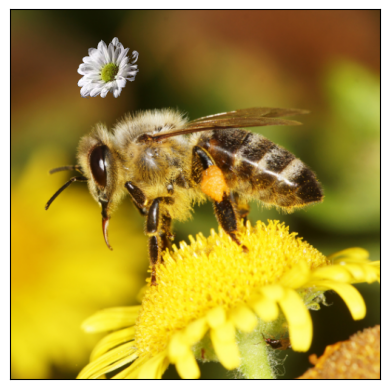

In [35]:
bee = cv.imread("images/native-bee.png")
flower = cv.imread("images/flower.jfif")

h, w = flower.shape[:2]
roi = bee[:h, :w]

flowergray = cv.cvtColor(flower, cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(flowergray, 75, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)

bee_bg = cv.bitwise_and(roi, roi, mask=mask_inv)

flower_fg = cv.bitwise_and(flower, flower, mask=mask)

dst = cv.add(bee_bg, flower_fg)
bee[:h, :w] = dst

# show_img("dst", bee)

bee = cv.cvtColor(bee, cv.COLOR_BGR2RGB)
plt_img(bee)

3. Apply custom sharpening kernel of aperture size 3 and 5 as shown below on 'native-bee.png':
$ 3 \times 3 kernel:$
$ \begin{bmatrix} 0 & -1 & 0 \\ -1 & 5 & -1 \\ 0 & -1 & 0\\ \end{bmatrix}$
$ 5 \times 5 kernel:$
$ \begin{bmatrix} -1 & -1 & -1 & -1 & -1 \\ -1 & -1 & -1 & -1 & -1 \\ -1 & -1 & 25 & -1 & -1 \\ -1 & -1 & -1 & -1 & -1 \\ -1 & -1 & -1 & -1 & -1 \\ \end{bmatrix}$
What can you infer from the outputs?

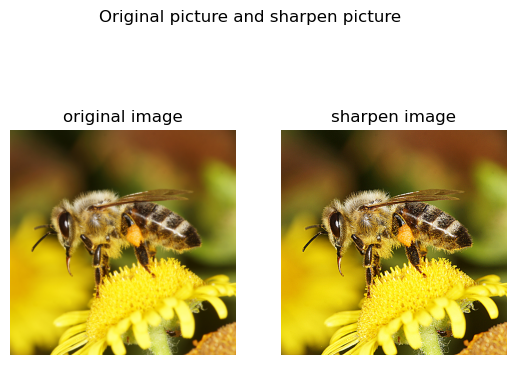

In [36]:
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

img = cv.imread("images/native-bee.png")
sharpen = cv.filter2D(img, -1, kernel)

# cv.imshow("native_bee", img)
# show_img("sharpen", sharpen)

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
sharpen = cv.cvtColor(sharpen, cv.COLOR_BGR2RGB)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("original image")
plt.axis("off")
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(sharpen)
plt.title("sharpen image")
plt.axis("off")
plt.xticks([]), plt.yticks([])

plt.suptitle("Original picture and sharpen picture")
plt.show()

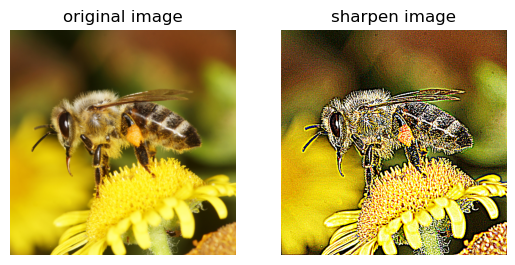

In [37]:
kernel = np.array([[-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, 25, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1]])

img = cv.imread("images/native-bee.png")
sharpen = cv.filter2D(img, -1, kernel)

# cv.imshow("native_bee", img)
# show_img("sharpen", sharpen)

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
sharpen = cv.cvtColor(sharpen, cv.COLOR_BGR2RGB)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("original image")
plt.axis("off")
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(sharpen)
plt.title("sharpen image")
plt.axis("off")
plt.xticks([]), plt.yticks([])

plt.show()

4. Apply different image smoothing techniques (e.g. average filter, Gaussian kernel and median filter) on 'noise_lena.jpg' and display the resulting images after the convolution. Comment on the outcomes and deduce the type of noise present on the image.

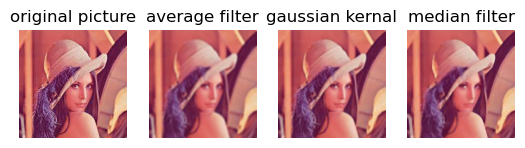

In [38]:
img = cv.imread("images/lena.jfif")

average_filter = cv.blur(img, (5, 5))
gaussian_kernal = cv.GaussianBlur(img, (5, 5), 0)
median_filter = cv.medianBlur(img, 5)

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
average_filter = cv.cvtColor(average_filter, cv.COLOR_BGR2RGB)
gaussian_kernal = cv.cvtColor(gaussian_kernal, cv.COLOR_BGR2RGB)
median_filter = cv.cvtColor(median_filter, cv.COLOR_BGR2RGB)

plt.subplot(1, 4, 1)
plt.imshow(img)
plt.title("original picture")
plt.axis("off")
plt.xticks([]), plt.yticks([])

plt.subplot(1, 4, 2)
plt.imshow(average_filter)
plt.title("average filter")
plt.axis("off")
plt.xticks([]), plt.yticks([])

plt.subplot(1, 4, 3)
plt.imshow(gaussian_kernal)
plt.title("gaussian kernal")
plt.axis("off")
plt.xticks([]), plt.yticks([])

plt.subplot(1, 4, 4)
plt.imshow(median_filter)
plt.title("median filter")
plt.axis("off")
plt.xticks([]), plt.yticks([])

plt.show()